<a href="https://colab.research.google.com/github/srujan-b/Assignment-2-Choose-Your-Own-Analysis/blob/main/Validating-Synthetic-Models-as-Surgical-Training-Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extract the videos

This Python code extracts the contents of a ZIP file ("videos_imra.zip") to a specified directory ("/content/drive/MyDrive/ColabNotebooks/videos_imra/"). It includes error handling to check for ZIP file corruption.

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/ColabNotebooks/videos_imra.zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/drive/MyDrive/ColabNotebooks/videos_imra/')  # Change the target directory as needed
    print("Extraction successful.")
except zipfile.BadZipFile:
    print("The ZIP file appears to be corrupted.")


# Main Code

## Library Import

These three lines of code import essential libraries for deep learning (PyTorch and torchvision) and computer vision (OpenCV), setting the foundation for image processing and machine learning tasks.

In [3]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib
import seaborn
import pandas as pd
import yaml
import cv2
import os
from IPython.display import display, HTML
import imageio

This line of code reads a CSV file named "imra_suturing_dataset.csv" located in the specified path into a Pandas DataFrame named "df" for further data manipulation and analysis.

## IMport df

In [17]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/imra_suturing_dataset.csv')

In [18]:
df

,ID,Typeofsuturing,videofilepath,videofilename,Category
0,AMRA001,Suturing,/videos_imra/Suturing/Novice/,Novice_dV_001_suture.mp4,Novice
1,AMRA001,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_001_interupted.mp4,Novice
2,AMRA006,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_006_suture.mp4,Novice
3,AMRA006,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_006_interupted.mp4,Novice
4,AMRA007,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_007_suture.mp4,Novice
5,AMRA007,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_007_interupted.mp4,Novice
6,AMRA008,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_008_suture.mp4,Expert
7,AMRA008,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_008_interupted.mp4,Expert
8,AMRA010,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_010_suture.mp4,Expert
9,AMRA011,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_010_interupted.mp4,Expert


This code iterates through rows in a Pandas DataFrame named 'df' and for each row, it checks and extracts properties (width, height, frame rate, and duration) of a video file specified in the DataFrame, then adds these properties to the DataFrame. If the video file is not found, it marks the properties as 'N/A' and prints a message about the missing file. This process is useful for video analysis and metadata extraction.

In [19]:
import cv2
import pandas as pd
import os

# Define the prefix to be added to all file paths
prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra/"  # Replace with your actual prefix

# Assuming your DataFrame is named 'df'
for index, row in df.iterrows():
    # Construct video path
    video_path = prefix + row['videofilepath'].lstrip('./') + row['videofilename']

    # Check if the video file exists at the specified location
    if os.path.exists(video_path):
        print(video_path)
        # Open the video file
        video = cv2.VideoCapture(video_path)

        # Extract video dimensions
        width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Extract frame rate (frames per second)
        fps = video.get(cv2.CAP_PROP_FPS)

        # Extract the duration (time) of the video in seconds
        frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        duration_sec = frame_count / fps

        # Add the extracted properties to the DataFrame
        df.at[index, 'Video_Width'] = width
        df.at[index, 'Video_Height'] = height
        df.at[index, 'Frame_Rate'] = fps
        df.at[index, 'Duration_Sec'] = duration_sec

        # Release the video capture
        video.release()
    else:
        # Video file not found at the specified location
        df.at[index, 'Video_Width'] = 'N/A'
        df.at[index, 'Video_Height'] = 'N/A'
        df.at[index, 'Frame_Rate'] = 'N/A'
        df.at[index, 'Duration_Sec'] = 'N/A'
        print(f"Video not found at location: {video_path}")




/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dV_001_suture.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Novice/Novice_dV_001_interupted.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dv_006_suture.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Novice/Novice_dV_006_interupted.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dv_007_suture.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Novice/Novice_dV_007_interupted.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Expert/Expert_dV_008_suture.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Expert/Expert_dV_008_interupted.mp4
/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Expert/Expert_dV_010_suture.mp4
/content/drive/My

In [21]:
df[df['Category'] == 'Expert']

,ID,Typeofsuturing,videofilepath,videofilename,Category,Video_Width,Video_Height,Frame_Rate,Duration_Sec
6,AMRA008,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_008_suture.mp4,Expert,1548.0,1080.0,30.0,194.066667
7,AMRA008,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_008_interupted.mp4,Expert,1532.0,1080.0,30.0,102.533333
8,AMRA010,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_010_suture.mp4,Expert,1548.0,1080.0,30.0,77.533333
9,AMRA011,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_010_interupted.mp4,Expert,1532.0,1080.0,30.0,95.466667
25,IMRA051,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_051_suture.mp4,Expert,1516.0,1080.0,50.0,106.100000
26,IMRA051,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_2_051_interupted.mp4,Expert,1516.0,1080.0,25.0,267.680000
27,IMRA051,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_1_051_interupted.mp4,Expert,1516.0,1080.0,25.0,253.880000


This code uses Matplotlib to create a bar chart showing the total video duration for each category in the DataFrame 'df' and labels the plot appropriately for visualizing combined suturing and interrupted suturing video categories.

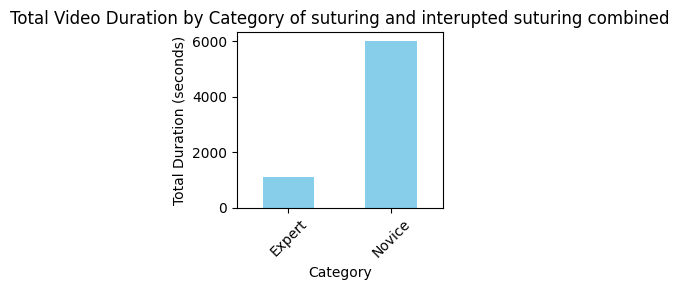

In [22]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Category' and calculate the sum of duration_sec for each category
category_duration = df.groupby('Category')['Duration_Sec'].sum()

# Plotting the data
plt.figure(figsize=(3, 3))
category_duration.plot(kind='bar', color='skyblue')
plt.title('Total Video Duration by Category of suturing and interupted suturing combined')
plt.xlabel('Category')
plt.ylabel('Total Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Video resizing and stablization

This code performs video processing on a set of videos listed in a DataFrame 'df'. It resizes the videos to a specified width and height, applies video stabilization using feature matching and frame alignment, and saves the processed videos to an output directory. The code also checks for existing processed videos to avoid reprocessing.

In [23]:
# Set the desired width and height (224x224 pixels)
width = 224
height = 224

# Set the desired frame rate (30 fps)
desired_frame_rate = 30

# Define the prefix for saving processed videos
prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra"  # Replace with your prefix

# Define a function to perform feature matching between frames
def feature_matching(prev_frame, current_frame):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(prev_frame, None)
    kp2, des2 = orb.detectAndCompute(current_frame, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Get good matches
    good_matches = matches[:20]  # Adjust the number of matches as needed

    if len(good_matches) >= 4:
        # Extract location of good matches
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Estimate affine transformation using RANSAC
        M, _ = cv2.estimateAffine2D(src_pts, dst_pts, cv2.RANSAC)

        return M

    return None

# Iterate through the DataFrame and process each video
for index, row in df.iterrows():
    input_video_path = prefix + row['videofilepath'] + row['videofilename']
    output_video_path = prefix + '/pixel_reduced' + row['videofilepath'] + row['videofilename']

    # Check if the output directory exists, and create it if not
    output_dir = os.path.dirname(output_video_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Check if the output video file already exists, and skip processing if it does
    if not os.path.exists(output_video_path):
        print(f"Processing video: {input_video_path}")

        # Open the input video file
        cap = cv2.VideoCapture(input_video_path)

        # Get the original video's frame width, height, and frame rate
        original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        original_frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

        if original_frame_rate < 30:
          frame_rate = desired_frame_rate
        else:
          frame_rate = original_frame_rate


        # Create a VideoWriter object to save the processed video
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
        out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height), isColor=True)

        # Initialize variables for video stabilization
        prev_frame = None

        while True:
            ret, frame = cap.read()

            if not ret:
                break

            # Resize the frame to the desired width and height
            frame = cv2.resize(frame, (width, height))

            # Convert the frame to grayscale
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Video stabilization using feature matching and frame alignment
            if prev_frame is not None:
                # Estimate the motion transformation matrix
                M = feature_matching(prev_frame, gray_frame)

                if M is not None:
                    # Apply the estimated transformation to the current frame
                    result_frame = cv2.warpAffine(frame, M, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
                else:
                    result_frame = frame  # If no transformation, keep the frame as is
            else:
                result_frame = frame  # First frame, no stabilization

            # Write the resulting frame to the output video
            out.write(result_frame)

            # Update the previous frame
            prev_frame = gray_frame

        # Release video objects
        cap.release()
        out.release()
        print(f"Video processed and saved to: {output_video_path}")
    else:
        print(f"Video already processed: {output_video_path}")

# Destroy any OpenCV windows if open
cv2.destroyAllWindows()


Video already processed: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Novice/Novice_dV_001_suture.mp4
Video already processed: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Novice/Novice_dV_001_interupted.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dv_006_suture.mp4
Video processed and saved to: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Novice/Novice_dv_006_suture.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Novice/Novice_dV_006_interupted.mp4
Video processed and saved to: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Novice/Novice_dV_006_interupted.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dv_007_suture.mp4
Video processed a

## Converting to frames and getting optical flow info

The provided Python code extracts frames and optical flow from video files and saves them as image files. Here's a summary of the code's functionality:

1. The code takes a video file as input and opens it for processing.

2. It calculates the original frame rate of the video.

3. An output directory is created to store the extracted frames and optical flow images.

4. The code uses the TV-L1 optical flow algorithm to calculate optical flow between consecutive frames in the video.

5. Frames are resized to a specified dimension (224x224 in this example) if needed.

6. Frames are saved as color images (BGR) without converting them to grayscale.

7. Optical flow is computed and saved as separate flow_x and flow_y components.

8. The code processes the video, skipping frames to match the desired frame rate specified (default is 10 frames per second).

9. The processed video is released, and the code completes its execution.

The modified code ensures that the frames are saved in color, preserving the original BGR color information. This code can be useful for various computer vision and video analysis tasks that require frame and optical flow data in color format.

In [25]:
df

,ID,Typeofsuturing,videofilepath,videofilename,Category,Video_Width,Video_Height,Frame_Rate,Duration_Sec
0,AMRA001,Suturing,/videos_imra/Suturing/Novice/,Novice_dV_001_suture.mp4,Novice,1548.0,1080.0,45.0,421.222222
1,AMRA001,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_001_interupted.mp4,Novice,1554.0,1080.0,30.0,254.900000
2,AMRA006,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_006_suture.mp4,Novice,1548.0,1080.0,45.0,221.266667
3,AMRA006,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_006_interupted.mp4,Novice,1554.0,1080.0,30.0,163.533333
4,AMRA007,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_007_suture.mp4,Novice,1548.0,1080.0,30.0,445.966667
5,AMRA007,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_007_interupted.mp4,Novice,1532.0,1080.0,30.0,314.400000
6,AMRA008,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_008_suture.mp4,Expert,1548.0,1080.0,30.0,194.066667
7,AMRA008,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_008_interupted.mp4,Expert,1532.0,1080.0,30.0,102.533333
8,AMRA010,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_010_suture.mp4,Expert,1548.0,1080.0,30.0,77.533333
9,AMRA011,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_010_interupted.mp4,Expert,1532.0,1080.0,30.0,95.466667


In [ ]:
import cv2
import os
from multiprocessing import Pool
import csv

def extract_frames_and_optical_flow(video_path, output_directory, frame_rate=10):



    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the original frame rate
    original_frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    print(f"Original frame rate: {original_frame_rate} FPS")

    # Extract the video file name without extension
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Create an output directory for frames
    frames_directory = os.path.join(output_directory, "frames", video_name)
    os.makedirs(frames_directory, exist_ok=True)
    print(f"Frames directory: {frames_directory}")

    # Create an output directory for optical flow images
    optical_flow_directory = os.path.join(output_directory,"opticalFlow", video_name)
    os.makedirs(optical_flow_directory, exist_ok=True)
    print(f"Optical flow directory: {optical_flow_directory}")

    # Initialize variables for TV-L1 optical flow
    prev_frame = None
    optical_flow = cv2.optflow.createOptFlow_DualTVL1()

    frame_count = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame if needed
        frame_resized = cv2.resize(frame, (224, 224))  # Change dimensions as needed

        if prev_frame is not None:
            # Calculate TV-L1 optical flow
            flow = optical_flow.calc(cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY),
                                     cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY), None)

            # Save the optical flow as separate x and y components
            flow_x = flow[..., 0]
            flow_y = flow[..., 1]

            flow_x_path = os.path.join(optical_flow_directory, f'flow_x_{frame_count:05d}.jpg')
            flow_y_path = os.path.join(optical_flow_directory, f'flow_y_{frame_count:05d}.jpg')

            cv2.imwrite(flow_x_path, flow_x)
            cv2.imwrite(flow_y_path, flow_y)

        frame_path = os.path.join(frames_directory, f'frame_{frame_count:05d}.jpg')
        cv2.imwrite(frame_path, frame)

        frame_count += 1

        # Set the previous frame for the next iteration
        prev_frame = frame_resized

        # Skip frames to match the desired frame rate
        skip_frames = int(original_frame_rate / frame_rate) - 1
        for _ in range(skip_frames):
            ret, _ = cap.read()
            if not ret:
                break

    # Release video object
    cap.release()
    print(f"Video processing complete for {video_name}")
    # Determine if it's an expert video (1 for expert, 0 for non-expert)
    is_expert = 1 if "expert" in video_name.lower() else 0

    # Return relevant information as a tuple
    return frames_directory, frame_count, frames_directory, is_expert

if __name__ == "__main__":
    # Set the prefix to your provided path
    prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced"

    # Create a list of video information tuples
    video_info_list = [
        (
            f"{prefix}{row['videofilepath']}{row['videofilename']}",
            f"{prefix}{row['videofilepath']}",
            30 if "expert" in row['videofilename'].lower() and row['Frame_Rate'] < 30
            else (row['Frame_Rate'] if "expert" in row['videofilename'].lower() and row['Frame_Rate'] > 30 else 10)
        )
        for index, row in df.iterrows()
    ]

    # Set the number of CPU cores to use for multiprocessing
    num_cpus = os.cpu_count()
    print(f"Number of CPU cores: {num_cpus}")

    # Create a multiprocessing pool and map the function to process videos
    with Pool(num_cpus) as pool:
       results = pool.starmap(extract_frames_and_optical_flow, video_info_list)

    # Collect all the results for all videos
    all_results = []

    for frames_dir, frame_count, frames_path, is_expert in results:
        all_results.append((frames_dir, frame_count, frames_path, is_expert))

    csv_filename = "video_results.csv"

    # Write the results to a CSV file
    with open(csv_filename, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["Frames Directory", "Frame Count", "Frames Path", "Is Expert"])
        for frames_dir, frame_count, frames_path, is_expert in all_results:
            csv_writer.writerow([frames_dir, frame_count, frames_path, is_expert])

    print(f"Results saved to {csv_filename}")

Number of CPU cores: 40
Original frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 45 FPS
Original frame rate: 30 FPSOriginal frame rate: 30 FPS


Original frame rate: 30 FPS
Original frame rate: 30 FPS

Original frame rate: 30 FPSOriginal frame rate: 30 FPSOriginal frame rate: 50 FPSOriginal frame rate: 45 FPSOriginal frame rate: 60 FPS
Original frame rate: 30 FPSOriginal frame rate: 60 FPSOriginal frame rate: 45 FPSOriginal frame rate: 30 FPS
Original frame rate: 30 FPS




Original frame rate: 30 FPS







Original frame rate: 30 FPSOriginal frame rate: 30 FPSFrames directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Expert/frames/Expert_dV_010_interupted


Frames directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Novice/frames/Novice_dV_012_suture
Frames directo

## New process

In [ ]:
import cv2
import os
from multiprocessing import Pool
import concurrent.futures
import time

def extract_frames_and_optical_flow(video_path, output_directory, frame_rate=10):



    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the original frame rate
    original_frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    print(f"Original frame rate: {original_frame_rate} FPS")

    # Extract the video file name without extension
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Create an output directory for frames
    frames_directory = os.path.join(output_directory, "frames", video_name)
    os.makedirs(frames_directory, exist_ok=True)
    print(f"Frames directory: {frames_directory}")

    # Create an output directory for optical flow images
    optical_flow_directory = os.path.join(output_directory,"opticalFlow", video_name)
    os.makedirs(optical_flow_directory, exist_ok=True)
    print(f"Optical flow directory: {optical_flow_directory}")

    # Initialize variables for TV-L1 optical flow
    prev_frame = None
    optical_flow = cv2.optflow.createOptFlow_DualTVL1()

    frame_count = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame if needed
        frame_resized = cv2.resize(frame, (224, 224))  # Change dimensions as needed

        if prev_frame is not None:
            # Calculate TV-L1 optical flow
            flow = optical_flow.calc(cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY),
                                     cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY), None)

            # Save the optical flow as separate x and y components
            flow_x = flow[..., 0]
            flow_y = flow[..., 1]

            flow_x_path = os.path.join(optical_flow_directory, f'flow_x_{frame_count:05d}.jpg')
            flow_y_path = os.path.join(optical_flow_directory, f'flow_y_{frame_count:05d}.jpg')

            cv2.imwrite(flow_x_path, flow_x)
            cv2.imwrite(flow_y_path, flow_y)

        frame_path = os.path.join(frames_directory, f'frame_{frame_count:05d}.jpg')
        cv2.imwrite(frame_path, frame)

        frame_count += 1

        # Set the previous frame for the next iteration
        prev_frame = frame_resized

        # Skip frames to match the desired frame rate
        skip_frames = int(original_frame_rate / frame_rate) - 1
        for _ in range(skip_frames):
            ret, _ = cap.read()
            if not ret:
                break

    # Release video object
    cap.release()
    print(f"Video processing complete for {video_name}")
'''
    total_frames = frame_count
    is_expert = 1 if "expert" in video_name.lower() else 0

    global frames_info_df
    frames_info_df = frames_info_df.append({
        "VideoName": video_name,
        "TotalFrames": total_frames,
        "FlowDirectory": frames_directory,
        "IsExpert": is_expert
    }, ignore_index=True)
    global flow_info_df
    flow_info_df = flow_info_df.append({
        "VideoName": video_name,
        "TotalFrames": total_frames,
        "FlowDirectory": optical_flow_directory,
        "IsExpert": is_expert
    }, ignore_index=True)
'''
if __name__ == "__main__":
    # Set the prefix to your provided path
    prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced"

    # Create a list of video information tuples
    video_info_list = [
        (
            f"{prefix}{row['videofilepath']}{row['videofilename']}",
            f"{prefix}{row['videofilepath']}",
            30 if "expert" in row['videofilename'].lower() else 10
        ) for index, row in df.iterrows()
    ]

    # Set the number of CPU cores to use for parallel processing
    num_cpus = os.cpu_count()
    print(f"Number of CPU cores: {num_cpus}")

    start_time = time.time()  # Record the start time

    # Create a ThreadPoolExecutor to process videos in parallel
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_cpus) as executor:
        # Use executor.map to asynchronously process videos in parallel
        executor.map(extract_frames_and_optical_flow, *zip(*video_info_list))

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time

    print(f"Processing completed in {elapsed_time:.2f} seconds.")
'''
    flow_csv_file_path = "/content/drive/MyDrive/ColabNotebooks/videos_imra/data_1_flow.csv"
    flow_info_df.to_csv(flow_csv_file_path, index=False)
    print("Flow information saved to CSV file:", flow_csv_file_path)

    frame_csv_file_path = "/content/drive/MyDrive/ColabNotebooks/videos_imra/data_1_frame.csv"
    frames_info_df.to_csv(frame_csv_file_path, index=False)
    print("Frame information saved to CSV file:", frame_csv_file_path)

'''

Number of CPU cores: 40
Original frame rate: 30 FPS
Frames directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Expert/frames/Expert_dV_008_suture
Optical flow directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Expert/opticalFlow/Expert_dV_008_suture
Video processing complete for Expert_dV_008_suture
Processing completed in 2596.06 seconds.


NameError: ignored